In [10]:
from scipy.spatial import Voronoi
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [11]:
%load_ext autoreload
%autoreload 1
%aimport lib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from lib import *

In [13]:
tsne = TSNE(n_components=2, random_state=0)
pca = PCA(n_components=2)

In [14]:
def make_two_clusters(n):
    pt0 = np.random.randn(int(np.floor(n/2)), 5)
    pt1 = np.array([[10,0,0,0,0]]) + 2 * np.random.randn(n-len(pt0),5)
    return np.concatenate([pt0,pt1])

def make_sphere(n,r):
    raw = np.random.randn(n,3)
    norm = np.linalg.norm(raw,axis=1).reshape(-1,1)
    return r*np.divide(raw,norm)

In [15]:
digits = datasets.load_digits()
digits_tsne = tsne.fit_transform(digits.data)
digits_tsne_vor = Voronoi(digits_tsne)
digits_pca = pca.fit(digits.data).transform(digits.data)
digits_pca_vor = Voronoi(digits_pca)

roll = datasets.make_swiss_roll(200,random_state=0)
roll_tsne = tsne.fit_transform(roll[0])
roll_tsne_vor = Voronoi(roll_tsne)
roll_pca = pca.fit(roll[0]).transform(roll[0])
roll_pca_vor = Voronoi(roll_pca)

np.random.seed(0)
noiseball = np.random.randn(200,10)
noiseball_tsne = tsne.fit_transform(noiseball)
noiseball_tsne_vor = Voronoi(noiseball_tsne)
noiseball_pca = pca.fit(noiseball).transform(noiseball)
noiseball_pca_vor = Voronoi(noiseball_pca)

np.random.seed(0)
sphere = make_sphere(200,0.5)
sphere_tsne = tsne.fit_transform(sphere)
sphere_tsne_vor = Voronoi(sphere_tsne)
sphere_pca = pca.fit(sphere).transform(sphere)
sphere_pca_vor = Voronoi(sphere_pca)

np.random.seed(0)
clust = make_two_clusters(200)
clust_tsne = tsne.fit_transform(clust)
clust_tsne_vor = Voronoi(clust_tsne)
clust_pca = pca.fit(clust).transform(clust)
clust_pca_vor = Voronoi(clust_pca)

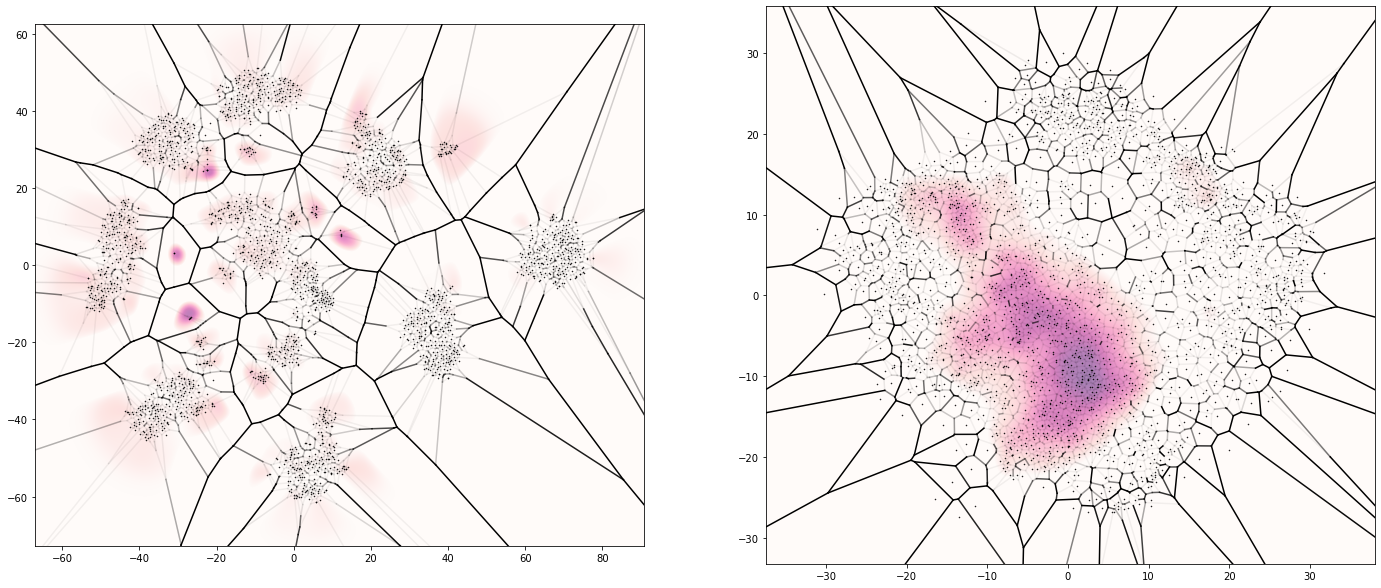

In [16]:
fig,axs = plt.subplots(1,2,figsize=(24,12))
draw_main(axs[0],digits_tsne_vor,digits.data,f_standard_crack,f_standard_strain,beta=1,gamma=5,point_size=0.25)
draw_main(axs[1],digits_pca_vor,digits.data,f_standard_crack,f_standard_strain,beta=1,gamma=5,point_size=0.25)
plt.show()

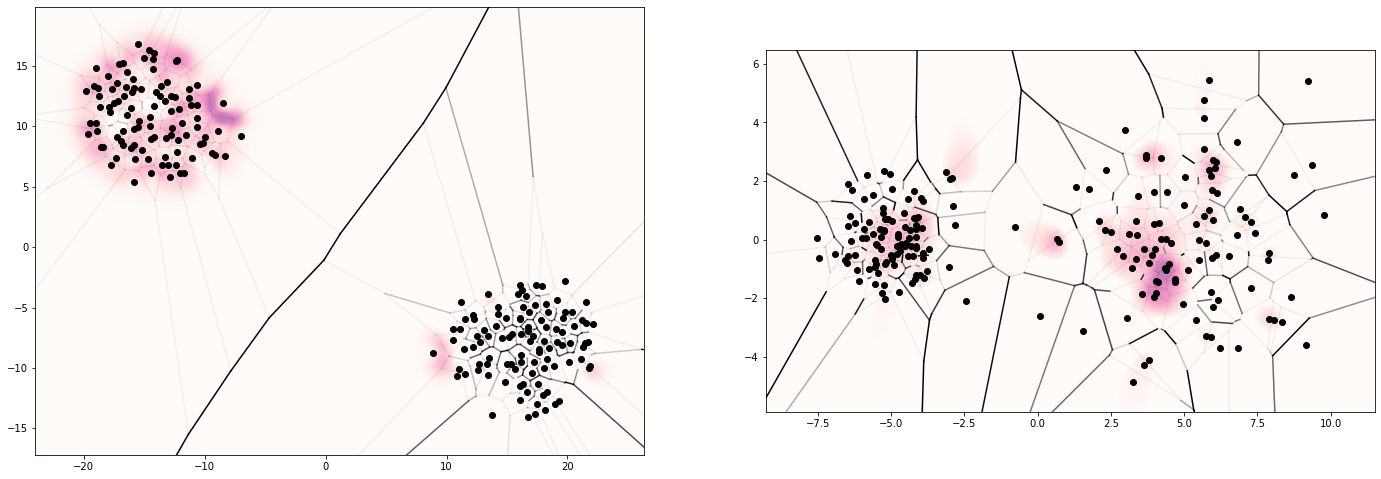

In [22]:
fig,axs = plt.subplots(1,2,figsize=(24,12))
draw_main(axs[0],clust_tsne_vor,clust,f_standard_crack,f_standard_strain,beta=5)
draw_main(axs[1],clust_pca_vor,clust,f_standard_crack,f_standard_strain,beta=5)
plt.show()

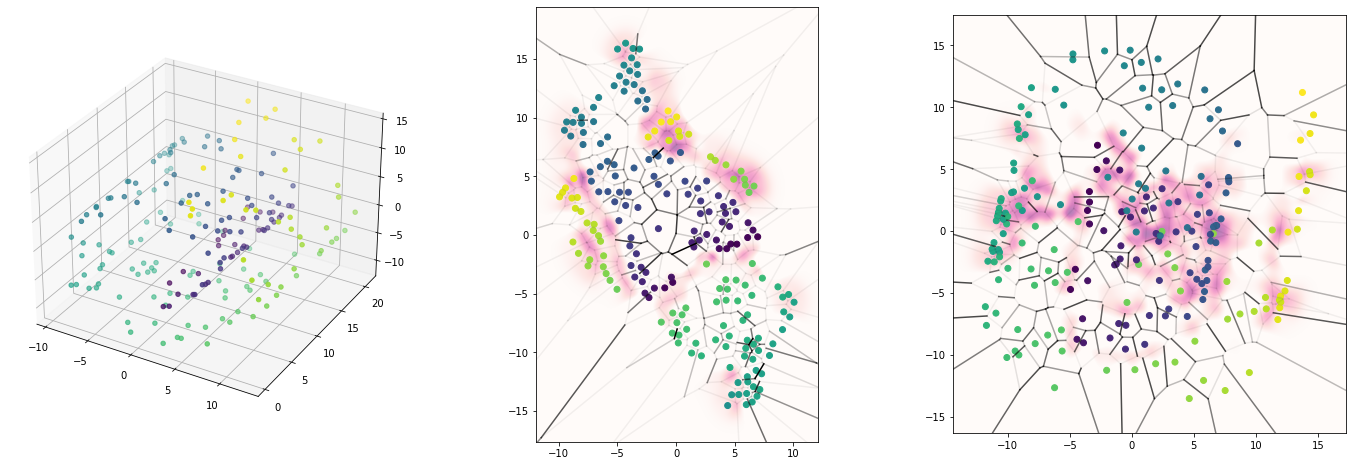

In [36]:
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(1,3,1,projection='3d')
ax.scatter(roll[0][:,0],roll[0][:,1],roll[0][:,2],c=roll[1])
draw_main(fig.add_subplot(1,3,2),roll_tsne_vor,roll[0],f_standard_crack,f_standard_strain,beta=5,values=roll[1])
draw_main(fig.add_subplot(1,3,3),roll_pca_vor,roll[0],f_standard_crack,f_standard_strain,beta=5,values=roll[1])
plt.show()

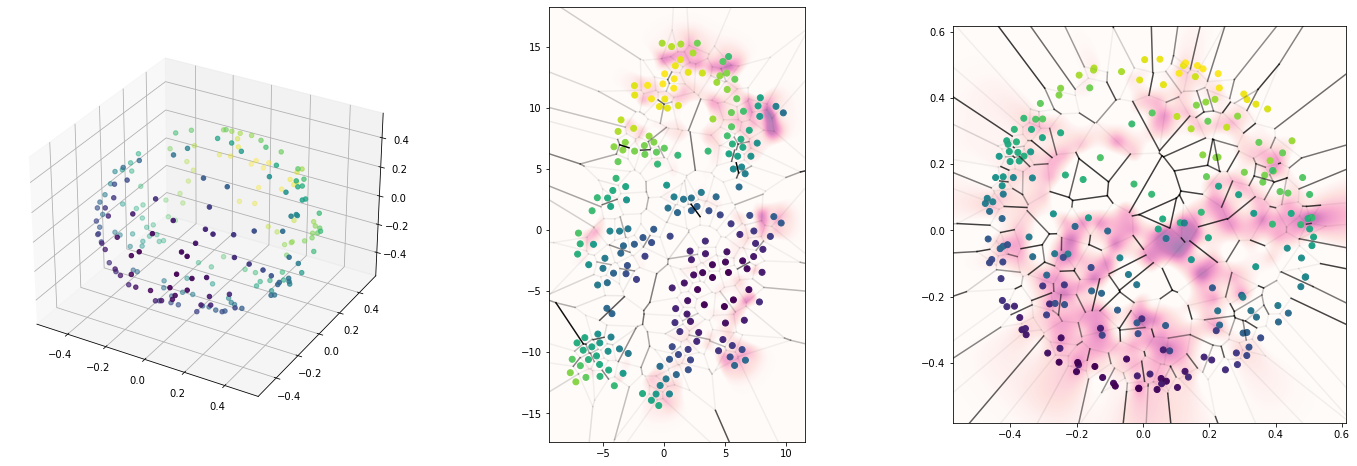

In [43]:
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(1,3,1,projection='3d')
ax.scatter(sphere[:,0],sphere[:,1],sphere[:,2],c=sphere[:,1])
draw_main(fig.add_subplot(1,3,2),sphere_tsne_vor,sphere,f_standard_crack,f_standard_strain,beta=5,values=sphere[:,1])
draw_main(fig.add_subplot(1,3,3),sphere_pca_vor,sphere,f_standard_crack,f_standard_strain,beta=50, gamma=0.1,values=sphere[:,1])
plt.show()